In [ ]:
# importing of packages 
import torch
import torch.nn as nn
import torch.optim as optim 
import torchvision
import torchvision.transforms as transforms
import numpy as np
import scipy 
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input


In [ ]:
print(tf.__version__)


2.9.2


In [ ]:
from google.colab import drive
import sys 

drive.mount('/content/gdrive')
sys.path.append("/content/gdrive/My Drive/SIT725")

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/SIT725/data_set.zip

(384, 512, 3)

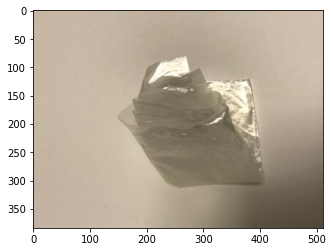

In [ ]:
img = image.load_img("validation/trash/trash6.jpg")
plt.imshow(img)
cv2.imread("train/trash/trash96.jpg").shape

In [ ]:
batch_size = 32
image_height = 384 
image_width = 512

In [ ]:
train = ImageDataGenerator(preprocessing_function = preprocess_input, 
                           shear_range = 0.2, 
                           zoom_range = 0.2,
                           horizontal_flip = True, 
                           validation_split = 0.3)

In [ ]:
trainDataset = train.flow_from_directory(directory = 'train/', 
                                         target_size = (image_height, image_width),
                                         batch_size = batch_size, 
                                         class_mode = 'categorical'
                                         )

validationDataset = train.flow_from_directory(directory = 'validation/', 
                                         target_size = (image_height, image_width),
                                         batch_size = batch_size, 
                                         class_mode = 'categorical'

                                         )

testDataset = train.flow_from_directory(directory = 'test/', 
                                         target_size = (384,512),
                                         batch_size = 1, 
                                         class_mode = None,
                                         shuffle = True
                                         )

Found 1757 images belonging to 6 classes.
Found 405 images belonging to 6 classes.
Found 365 images belonging to 1 classes.


In [ ]:
x= testDataset.next()

base_model = ResNet50(include_top = False, weights = 'imagenet')
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
predictions = tf.keras.layers.Dense(trainDataset.num_classes, activation='softmax')(x)
model = tf.keras.Model(inputs = base_model.input, outputs = predictions)

for layer in base_model.layers:
    layer.trainable = False 

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])


model.fit(trainDataset, epochs = 25)

model.save('model.h5')

94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/25


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
55/55 [==============================] - 83s 1s/step - loss: 0.8176 - accuracy: 0.7473
Epoch 2/25
55/55 [==============================] - 70s 1s/step - loss: 0.3049 - accuracy: 0.8936
Epoch 3/25
55/55 [==============================] - 69s 1s/step - loss: 0.2183 - accuracy: 0.9266
Epoch 4/25
55/55 [==============================] - 69s 1s/step - loss: 0.1522 - accuracy: 0.9476
Epoch 5/25
55/55 [==============================] - 70s 1s/step - loss: 0.0888 - accuracy: 0.9693
Epoch 6/25
55/55 [==============================] - 68s 1s/step - loss: 0.0691 - accuracy: 0.9784
Epoch 7/25
55/55 [==============================] - 68s 1s/step - loss: 0.0700 -

In [ ]:
dir_path = 'test/all_classes'

model_loaded = tf.keras.models.load_model("/content/gdrive/MyDrive/SIT725/model.h5")

print(model_loaded.summary())

for i in range(10):
    img = image.load_img(dir_path + '//' +os.listdir(dir_path)[i])
    plt.imshow(img)
    plt.show()
    print('image label: '+ os.listdir(dir_path)[i])
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])

    val = model_loaded.predict(images) 
    pred = val.argmax()

    if pred == 0 : 
         print("predicted cardboard")
    elif pred == 1:
         print("predicted glass")
    elif pred == 2:
         print("predicted metal")
    elif pred == 3:
         print("predicted paper")
    elif pred == 4:
         print("predicted plastic")
    else:
         print("predicted trash")

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!tensorflowjs_converter --input_format=keras '/content/gdrive/MyDrive/SIT725/model.h5' "/content/gdrive/MyDrive/SIT725/model_json"


2023-01-27 19:45:27.445118: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-01-27 19:45:27.445223: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2023-01-27 19:45:27.445242: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [ ]:
!zip -r model.zip model 


  adding: model/ (stored 0%)
  adding: model/group1-shard16of25.bin (deflated 7%)
  adding: model/group1-shard15of25.bin (deflated 7%)
  adding: model/model.json (deflated 96%)
  adding: model/group1-shard14of25.bin (deflated 7%)
  adding: model/group1-shard9of25.bin (deflated 7%)
  adding: model/group1-shard20of25.bin (deflated 7%)
  adding: model/group1-shard5of25.bin (deflated 7%)
  adding: model/group1-shard23of25.bin (deflated 8%)
  adding: model/group1-shard11of25.bin (deflated 7%)
  adding: model/group1-shard19of25.bin (deflated 7%)
  adding: model/group1-shard22of25.bin (deflated 7%)
  adding: model/group1-shard25of25.bin (deflated 7%)
  adding: model/group1-shard18of25.bin (deflated 7%)
  adding: model/group1-shard24of25.bin (deflated 7%)
  adding: model/group1-shard17of25.bin (deflated 7%)
  adding: model/group1-shard4of25.bin (deflated 7%)
  adding: model/group1-shard6of25.bin (deflated 7%)
  adding: model/group1-shard12of25.bin (deflated 7%)
  adding: model/group1-shard2of2

In [ ]:
from google.colab import files
files.download('model_json.zip')

FileNotFoundError: ignored